In [ ]:
import sys
import numpy
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv("/content/flightdata.csv")


In [ ]:
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
dataset.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'Unnamed: 25'],
      dtype='object')

In [ ]:
dataset.ARR_DEL15.value_counts()

0.0    6284
1.0     976
Name: ARR_DEL15, dtype: int64

In [ ]:
dataset.isnull().any()

YEAR                   False
QUARTER                False
MONTH                  False
DAY_OF_MONTH           False
DAY_OF_WEEK            False
UNIQUE_CARRIER         False
TAIL_NUM               False
FL_NUM                 False
ORIGIN_AIRPORT_ID      False
ORIGIN                 False
DEST_AIRPORT_ID        False
DEST                   False
CRS_DEP_TIME           False
DEP_TIME                True
DEP_DELAY               True
DEP_DEL15               True
CRS_ARR_TIME           False
ARR_TIME                True
ARR_DELAY               True
ARR_DEL15               True
CANCELLED              False
DIVERTED               False
CRS_ELAPSED_TIME        True
ACTUAL_ELAPSED_TIME     True
DISTANCE                True
Unnamed: 25             True
dtype: bool

In [ ]:
dataset.isnull().sum()

YEAR                      0
QUARTER                   0
MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
UNIQUE_CARRIER            0
TAIL_NUM                  0
FL_NUM                    0
ORIGIN_AIRPORT_ID         0
ORIGIN                    0
DEST_AIRPORT_ID           0
DEST                      0
CRS_DEP_TIME              0
DEP_TIME                103
DEP_DELAY               103
DEP_DEL15               103
CRS_ARR_TIME              0
ARR_TIME                110
ARR_DELAY               166
ARR_DEL15               166
CANCELLED                 0
DIVERTED                  0
CRS_ELAPSED_TIME          1
ACTUAL_ELAPSED_TIME     167
DISTANCE                  1
Unnamed: 25            7426
dtype: int64

In [ ]:
dataset['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [ ]:
dataset = dataset.drop('Unnamed: 25', axis=1)
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               103
DEP_DELAY              103
DEP_DEL15              103
CRS_ARR_TIME             0
ARR_TIME               110
ARR_DELAY              166
ARR_DEL15              166
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         1
ACTUAL_ELAPSED_TIME    167
DISTANCE                 1
dtype: int64

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
flight_data = pd.read_csv("/content/flightdata.csv")
flight_data.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,7426.0,7426.000000,7426.000000,7426.000000,7426.000000,7426.000000,7426.000000,7426.000000,7426.000000,7323.000000,...,7426.000000,7316.000000,7260.000000,7260.000000,7426.000000,7426.000000,7425.000000,7259.000000,7425.000000,0.0
mean,2016.0,1.941422,4.695529,15.605979,3.971721,1362.837463,12329.536628,12300.357393,1309.945731,1317.812509,...,1517.681390,1505.676189,-0.846281,0.134435,0.014678,0.007676,190.251313,179.399780,1159.209293,NaN
std,0.0,0.789111,2.298253,8.686575,2.001281,798.865147,1596.871113,1599.189425,497.043710,507.575809,...,507.768754,519.519188,42.926449,0.341143,0.120269,0.087280,78.645928,77.817772,645.138101,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,78.000000,509.000000,NaN
25%,2016.0,1.000000,3.000000,8.000000,2.000000,721.000000,10397.000000,10397.000000,900.000000,901.000000,...,1116.000000,1113.000000,-19.000000,0.000000,0.000000,0.000000,125.000000,116.000000,594.000000,NaN
50%,2016.0,2.000000,5.000000,16.000000,4.000000,1290.000000,12478.000000,12478.000000,1315.000000,1316.000000,...,1545.000000,1536.500000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,7.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1737.000000,...,1945.000000,1941.000000,2.000000,0.000000,0.000000,0.000000,254.000000,236.000000,1927.000000,NaN
max,2016.0,3.000000,8.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2358.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


<Axes: xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

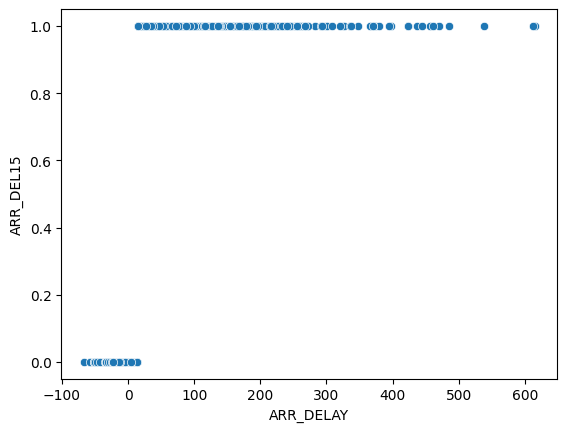

In [ ]:
sns.scatterplot(x='ARR_DELAY',y='ARR_DEL15',data=flight_data)

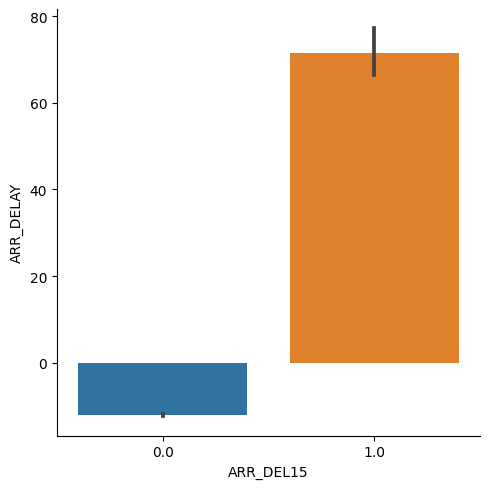

In [ ]:
sns.catplot(x='ARR_DEL15',y='ARR_DELAY',kind='bar',data=flight_data)

<ipython-input-72-aa6664222663>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

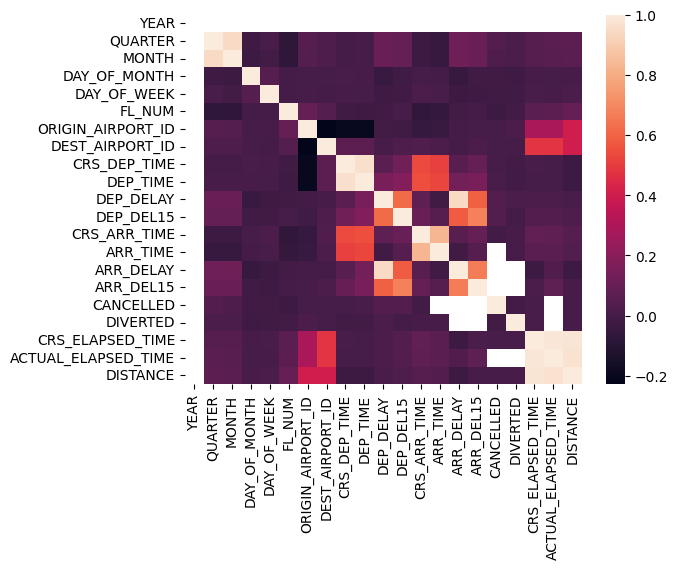

In [ ]:
sns.heatmap(dataset.corr())

In [ ]:
dataset = dataset[["FL_NUM", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME", "DEP_DEL15", "ARR_DEL15"]]
dataset.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       103
ARR_DEL15       166
dtype: int64

In [ ]:
dataset[dataset.isnull().any(axis=1)].head(5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,NaN
179,86,1,10,7,MSP,DTW,1632,NaN,NaN
184,557,1,10,7,MSP,DTW,912,0.0,NaN
210,1096,1,10,7,DTW,MSP,1303,NaN,NaN
478,1542,1,22,5,SEA,JFK,723,NaN,NaN


In [ ]:
dataset['DEP_DEL15'].mode()

0    0.0
Name: DEP_DEL15, dtype: float64

In [ ]:
#replace the misssing values
dataset = dataset.fillna({'ARR_DEL15': 1})
dataset = dataset.fillna({'ARR_DEL15': 0})
dataset.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,NaN,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [ ]:
import math

for index, row in dataset.iterrows():
  dataset.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] / 100)
dataset.head()  

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset['DEST'])
dataset['ORIGIN'] = le.fit_transform(dataset['ORIGIN'])

In [ ]:
dataset.head(5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [ ]:
dataset['ORIGIN'].unique()

array([0, 1, 4, 3, 2])

In [ ]:
dataset = pd.get_dummies(dataset, columns=['ORIGIN', 'DEST'])
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,14,0.0,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,12,0.0,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,13,0.0,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,6,0.0,0.0,0,0,0,0,1,0,1,0,0,0


In [ ]:
dataset.iloc[:, 8:9]

,ORIGIN_1
0,0
1,1
2,0
3,0
4,0
...,...
7421,1
7422,0
7423,0
7424,0


In [ ]:
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8:9].values

In [ ]:
y

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [ ]:
x

array([[1.399e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.476e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.597e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.866e+03, 8.000e+00, 2.900e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.995e+03, 8.000e+00, 2.900e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.032e+03, 8.000e+00, 2.900e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
x.shape

(7426, 8)

In [ ]:
y.shape

(7426, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
z=oh.fit_transform(x[:, 4:5]).toarray()
t=oh.fit_transform(x[:, 5:6]).toarray()
#x=np.delete(x,[4,7],axis=1)

In [ ]:
z

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
t

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
x=np.delete(x,[4,5],axis=1)

In [ ]:
x.shape

(7426, 6)

In [ ]:
x=np.concatenate((t,z,x),axis = 1)

In [ ]:
x.shape

(7426, 30)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_test.shape

(1486, 30)

In [ ]:
x_train.shape

(5940, 30)

In [ ]:
y_test.shape

(1486, 1)

In [ ]:
y_train.shape

(5940, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
decisiontree = classifier.predict(x_test)

In [ ]:
decisiontree

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score
desacc = accuracy_score(y_test,decisiontree)

In [ ]:
desacc

0.9912516823687753

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,decisiontree)

In [ ]:
cm

array([[1177,    8],
       [   5,  296]])

In [ ]:
import sklearn.metrics as metrics
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test,decisiontree)
roc_auc1 = metrics.auc(fpr1,tpr1)

In [ ]:
fpr1

array([0.        , 0.00675105, 1.        ])

In [ ]:
tpr1

array([0.       , 0.9833887, 1.       ])

In [ ]:
threshold1

array([2, 1, 0])

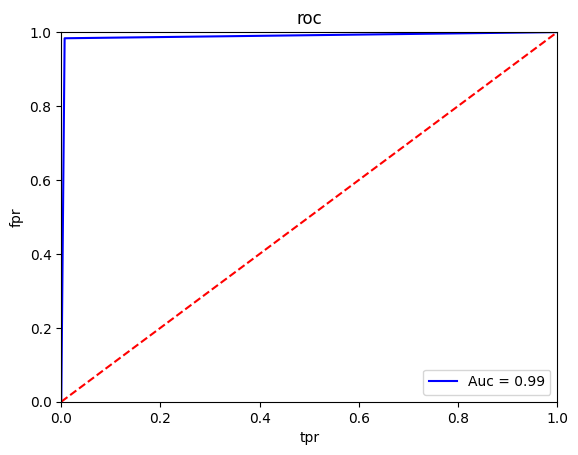

In [ ]:
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr1,tpr1,'b',label='Auc = %0.2f'% roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

In [ ]:
import pickle
pickle.dump(classifier,open('flight.pkl','wb'))